# Homework 1 - Basic practice in Jupyter and Python.

Programming can only be learned by doing. The following exercises blend coding math and text to create clearly defined results. For example, instead of calculating a simple number, you must print the number plus the units (e.g. 24 mg/L). 

### Academic honesty statement

**Solution**

Place your academic honesty statement below. Here are some acceptable examples.

-   I worked alone on this assignment.




# Problem 1: Gas Laws



The virial equation for a gas can be represented as $\frac{PV}{RT} = 1 + \frac{B}{V} + \frac{C}{V^2}$ where $V$ is the molar volume.

For isopropanol $B=-388 cm^3/mol$ and $C=-26,000 cm^6/mol^2$.

We are going to find $V$ for isopropanol at 200 ∘C and 10 bar with a graphical technique.

In this problem $R=83.14 cm^3 bar / (mol K)$.



### Compute V for an ideal gas



The ideal gas law is $1 = \frac{PV}{RT}$. Use this to estimate the volume of isopropanol in the ideal gas state. Print your answer with one decimal place and the printed answer **must include units.**



In [1]:
R = 83.14; #cm^3 bar/(mol K)
T = 200+273; # Kelvin
P = 10; # Bar

V = R*T/P;

print( '%.1f'%V,'cm^3/mol')

3932.5 cm^3/mol


### Compute V for the Virial Gas Law



To do this, create a new function:

$f(V) = \frac{PV}{RT} - 1 - \frac{B}{V} - \frac{C}{V^2} = 0$

and then find values of $V$ where $f(V) = 0$. Start by defining this function and test that it works.Show that your function works by evaluating it for some examples, including an array of volumes.



In [2]:
# R, P and T are already defined in a previous cell. This information does pass cell to cell.

def f(V):
    B = -388;
    C = -26000;
    return (P * V / R / T) - 1 - (B / V) - (C / (V**2))

# Show a single number works
f(1000), f(3000)


(-0.3317102592178759, -0.10490855543140568)

### Plot f(V) over a range where you can observe a zero



You should make the x-axis sufficiently zoomed in to estimate the solution to about 10 cm<sup>3</sup>.



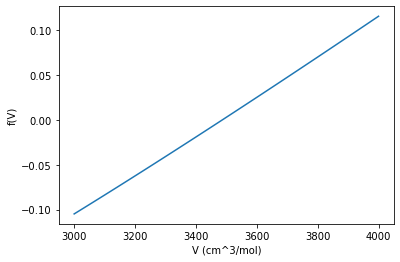

In [3]:
# Now we need to consider some of the libraries used in lecture 1 & 2.

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Create a list of value for volume 
V = np.linspace(3000, 4000)

# Neat item to be aware of. As long as an array is provided, the function will evaluate f at each entry in the array.
# For example:
# print(f(V))

plt.plot(V, f(V))
plt.xlabel('V (cm^3/mol)')
plt.ylabel('f(V)');

State in words where the solution(s) are.

**f(v) crosses zero near V~3486. **



### Express this in the form of a cubic polynomial in $V$



Derive an alternative expression for f(V) where it is a cubic polynomial of the form $0 = a V^3 + b V^2 + c V + d$. Write this expression in LaTeX, with explicit definitions for the coefficients.

Answer : 
$\frac{P}{R T} V^3 - V^2 - B V - C = 0$.



# Problem 2: Running and plotting an ODE

Most programming is repeative. Once you learn how to run an ODE solver, running it again in the future involves just editing prior code. We discussed the Lorenz equations in class, now we'll run them ourselves. The equations are as follows: 

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

These equations are to describe a 2 dimensional layer of fluid that is heat from below and cooled from above. The derivation of these equations is beyond our interest here but can be found easily online. We want to focus on how to simulate such equations.

In the above, x is proportional to the intensity of the convective motion, while y is proportional to the temperature difference between the ascending and descending currents, similar signs of x and y denoting that warm fluid is rising and cold fluid is descending. The variable z is proportional to the distortion of vertical temperature profile from linearity, a positive value indicating that the strongest gradients occur near the boundaries.

Let the parameters be
\begin{align}
\sigma =10\\
\beta =8/3\\
\rho =28\\
\end{align}

We will ignore units for this problem.

In the space below, 
1. Simulate this system with initial conditions of x = y = z = 1. Simulate out to time 1000 and take 0.1 time unit step sizes. Save the necessary results in a matrix.


In [4]:
#@title
# Import the required modules
import numpy as np # Already loaded above. But twice never hurts :-)
import math
import matplotlib.pyplot as plt # same. Not necessay but why not.
# This makes the plots appear inside the notebook
%matplotlib inline

from scipy.integrate import odeint

# Define a function which calculates the derivatives for us.

def derivatives(v,t):
    # Here, v has to be a vector with 3 entries. v =[x, y, z];
    # we can distribute the values to make life easier
    x = v[0];
    y = v[1];
    z = v[2];
    
    # Then define parameters:    
    theta = 10;
    beta = 8/3;
    rho = 28;
    
    # Lastly, define the derivative equations
    
    f = [theta * (y-x),
        rho*x-y-x*z,
        -beta*z+x*y]
    return f

## Sanity check time! Does the dervitives function work?
#derivatives([1,0,0],90)

timesteps = np.linspace(0,100,10000)
v0 = [1,1,1]
output = odeint(derivatives, v0, timesteps)



2. Simulate the system again but with x = y = 1 and z = 0.9999 (precisely). Save the necessary results in a matrix.

In [5]:
v0 = [1,1,.9999]
output2 = odeint(derivatives, v0, timesteps)


3. On a single plot, plot x vs y from 1 and 2 above. Be sure to label axes.

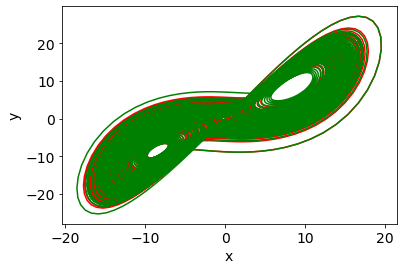

In [6]:

# Plot the numerical solution. Can't really see much at this angle.
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("x")
plt.ylabel("y")
plt.plot(output[:,0],output[:,1], 'r');
plt.plot(output2[:,0],output2[:,1], 'g');


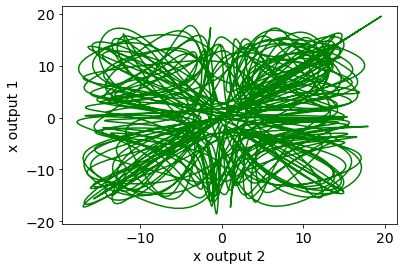

In [7]:
# Plotting x vs x from both simulations would have been better.

plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("x output 2")
plt.ylabel("x output 1")
plt.plot(output[:,0],output2[:,0],'g');

4. On a single plot, plot x vs z from 1 and 2 above. Be sure to label axes.

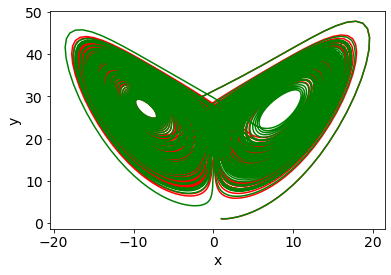

In [8]:
# Plot the numerical solution. Can't really see much at this angle.
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("x")
plt.ylabel("y")
plt.plot(output[:,0],output[:,2], 'r');
plt.plot(output2[:,0],output2[:,2], 'g');


5. On a single plot, plot x vs time from 1 and 2 above. Be sure to label.

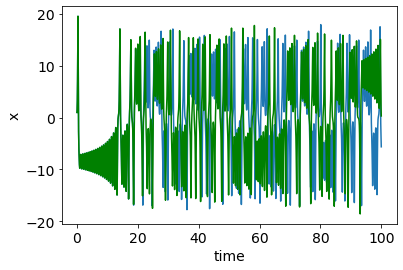

In [9]:
# Plot the numerical solution. Can't really see much at this angle.
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("x")
plt.plot(timesteps,output[:,0]);
plt.plot(timesteps,output2[:,0], 'g');

6. After completing all simulations, comment on how changing the initial value of z by 0.01% impacted the simulation outcomes. Be sure to use a Markdown cell for this.

**Write your answer here.**

**By zooming in or considering other plotting combinations**, it should be clear that a 0.01% change in the initial condition leads to very different dynamics responses. Why is this important? Because initial conditions are things that have to be measured. And nothing can be measured perfectly. For systems such as this, nearly infinitely small errors lead to huge differences. Which is a way of saying the actual long term behavior cannot be predicted.

# Problem 3 - Reading COVID data and Prediction

I hope I mentioned in class that when it comes to addressing engineering questions computationally, you will often be expected to learn on your own. This means using google or what have you and searching for specific libraries that can help solve the problem at hand. 

Here, I have provided some data that I pulled from the New York Time's GitHub COVID-19 data repository. The file is called florida.csv and contains COVID outbreak data specific to Florida. The data contains: the week since the start of the outbreak, the 7 day sliding average of the number of COVID positive cases and the 7 day sliding average of the number of deaths reported.

In the cell below, write the code necessary to load this data into the workspace and give the resulting array the name "dat". The numpy.genfromtxt function may be helpful.

In [52]:
#use np.genfromtxt
file = 'florida.csv'
dat = np.genfromtxt(file, delimiter=',', names = True)

#Another approach is to not set names = "True" and ignore first row. 
# Then you can use only matrix functions and not worry about the 


In [60]:
# Not necessary but might help keep your data organized.

week = []
cases = [] 
deaths = []
for i in range(len(dat)): 
    week.append(dat[i][0])
    cases.append(dat[i][1])
    deaths.append(dat[i][2])
    
    
# Python can be frustrated because of the types of data structures. Practice will get us used to these. The dat here is
# a "structured array" and has to be accessed differently than a normal array. For example, instead of the 
# for loop, we can call each column by name. trying running these below.
# print(dat['week'])
# print(dat['cases_avg'])
# print(dat.dtype)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196.
 197. 

In [12]:
## ANOTHER APPROACH USING PANDAS

#using pandas 
#import pandas as pd 
#dat = pd.read_csv(file, header=0)
#dat

Next, make a points plot with the average number of cases on the x axis and the average number of deaths on the y axis. Have the color of the points change according to the week of the infection. There are a lot of ways to generate such a plot. Consider matlibplot and ggplot2. After plotting, create a markdown cell and comment on the how these two features have evolved in time.

Text(0, 0.5, 'Deaths Avg')

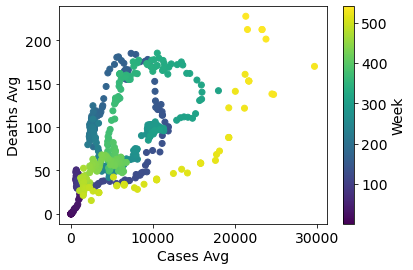

In [13]:
import numpy as np 
plt.scatter(cases, deaths, c = week)
cbar = plt.colorbar()
cbar.set_label('Week')
plt.xlabel("Cases Avg")
plt.ylabel("Deaths Avg")


**Put Commentary here:** 

One goal of every scientist should be to use data for predictions. Here, we'll use this goal as a chance to practice for loops. 

Ideally, in a world without delays and nonlinearities, the best way to predict an outcome is with a linear model, aka a straight line. Right a "for loop" which adds 4 straight lines to our plot of average infection and average mortality. Each line should have an intercept at zero and a slope of 0.001, 0.01, 0.1 and 1. 

(0.0, 2000.0)

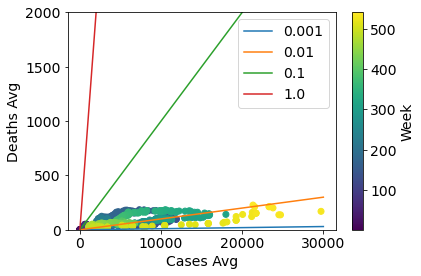

In [14]:
plt.scatter(cases, deaths, c = week)
cbar = plt.colorbar()
cbar.set_label('Week')
plt.xlabel("Cases Avg")
plt.ylabel("Deaths Avg")

for i in range(4): 
    slope = 0.001*(10)**i
    x_lin = np.linspace(0,30000,1000)
    y_lin = slope*x_lin
    plt.plot(x_lin, y_lin, label = slope)

plt.legend()
plt.ylim(0,2000)

Using just your eyes, which straight line seems to best fit the data? What does best fit mean? 

We can easily see that the slope of 0.01 fits the data the best. 

From this plot, we observe that the line of best fit is the line with a slope of 0.01. 

(0.0, 500.0)

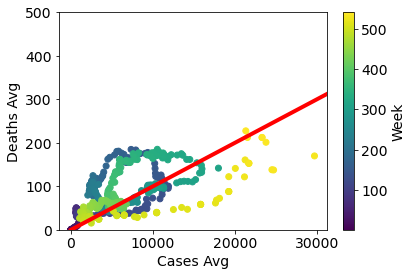

In [21]:
# ANother solution. Can use axline to plot straight lines with defined slopes. 

plt.scatter(cases, deaths, c = week)
cbar = plt.colorbar()
cbar.set_label('Week')
plt.xlabel("Cases Avg")
plt.ylabel("Deaths Avg")

plt.axline((0, 0), slope= .01, linewidth=4, color='r')


plt.ylim(0,500)